# Stock Prices Prediction Using Keras Long Term Short Memory

In [2]:
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the training set
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
dataset_train.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [7]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
#include 60,exclude 2035
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train
X_train.shape

(1975, 60)

In [8]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
print X_train.shape
print y_train.shape

(1975, 60, 1)
(1975,)


In [10]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [11]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [12]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [16]:

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)



Epoch 1/10
1975/1975 [==============================] - 39s 20ms/step - loss: 0.0022
Epoch 2/10
1975/1975 [==============================] - 33s 17ms/step - loss: 0.0019
Epoch 3/10
1975/1975 [==============================] - 34s 17ms/step - loss: 0.0022
Epoch 4/10
1975/1975 [==============================] - 33s 17ms/step - loss: 0.0015
Epoch 5/10
1975/1975 [==============================] - 33s 17ms/step - loss: 0.0016
Epoch 6/10
1975/1975 [==============================] - 34s 17ms/step - loss: 0.0015
Epoch 7/10
1975/1975 [==============================] - 33s 17ms/step - loss: 0.0015
Epoch 8/10
1975/1975 [==============================] - 33s 16ms/step - loss: 0.0017
Epoch 9/10
1975/1975 [==============================] - 33s 17ms/step - loss: 0.0013
Epoch 10/10
1975/1975 [==============================] - 32s 16ms/step - loss: 0.0013


In [17]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
print real_stock_price

[[220.1 ]
 [221.1 ]
 [229.45]
 [230.3 ]
 [237.7 ]
 [237.1 ]
 [229.7 ]
 [226.25]
 [215.  ]
 [215.  ]
 [215.5 ]
 [208.  ]
 [217.  ]
 [223.5 ]
 [230.  ]
 [234.55]]


In [18]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
print dataset_total

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
5       235.00
6       235.95
7       237.90
8       233.15
9       223.45
10      216.35
11      222.50
12      222.50
13      221.00
14      224.00
15      222.00
16      238.20
17      236.00
18      237.00
19      235.35
20      233.85
21      237.00
22      231.80
23      234.50
24      240.30
25      246.90
26      244.00
27      240.80
28      236.05
29      235.00
         ...  
2021    112.00
2022    114.10
2023    117.00
2024    118.50
2025    118.30
2026    117.30
2027    116.50
2028    112.50
2029    118.00
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
0       220.10
1       221.10
2       229.45
3       230.30
4       237.70
5       237.10
6       229.70
7       226.25
8       215.00
9       215.00
10      215.50
11      208.00
12      217.00
13      223.50
14      230.00
15      234.55
Name: Open, Length: 2051, dtype: float64


In [19]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print inputs

[131.9  134.5  134.5  134.75 130.1  128.   125.   124.4  121.3  122.3
 123.3  124.6  126.35 123.45 121.6  123.   124.55 122.5  122.8  124.
 124.85 126.15 128.5  127.7  128.   124.   123.25 122.5  124.2  121.65
 117.   118.8  119.   118.2  116.   118.45 114.   112.   110.   110.15
 111.9  115.95 113.4  113.   113.75 112.9  112.   114.1  117.   118.5
 118.3  117.3  116.5  112.5  118.   117.6  120.1  121.8  120.3  122.1
 220.1  221.1  229.45 230.3  237.7  237.1  229.7  226.25 215.   215.
 215.5  208.   217.   223.5  230.   234.55]


In [20]:
inputs = inputs.reshape(-1,1)
print inputs

[[131.9 ]
 [134.5 ]
 [134.5 ]
 [134.75]
 [130.1 ]
 [128.  ]
 [125.  ]
 [124.4 ]
 [121.3 ]
 [122.3 ]
 [123.3 ]
 [124.6 ]
 [126.35]
 [123.45]
 [121.6 ]
 [123.  ]
 [124.55]
 [122.5 ]
 [122.8 ]
 [124.  ]
 [124.85]
 [126.15]
 [128.5 ]
 [127.7 ]
 [128.  ]
 [124.  ]
 [123.25]
 [122.5 ]
 [124.2 ]
 [121.65]
 [117.  ]
 [118.8 ]
 [119.  ]
 [118.2 ]
 [116.  ]
 [118.45]
 [114.  ]
 [112.  ]
 [110.  ]
 [110.15]
 [111.9 ]
 [115.95]
 [113.4 ]
 [113.  ]
 [113.75]
 [112.9 ]
 [112.  ]
 [114.1 ]
 [117.  ]
 [118.5 ]
 [118.3 ]
 [117.3 ]
 [116.5 ]
 [112.5 ]
 [118.  ]
 [117.6 ]
 [120.1 ]
 [121.8 ]
 [120.3 ]
 [122.1 ]
 [220.1 ]
 [221.1 ]
 [229.45]
 [230.3 ]
 [237.7 ]
 [237.1 ]
 [229.7 ]
 [226.25]
 [215.  ]
 [215.  ]
 [215.5 ]
 [208.  ]
 [217.  ]
 [223.5 ]
 [230.  ]
 [234.55]]


In [22]:
inputs = sc.transform(inputs)
print inputs

[[0.20600162]
 [0.21654501]
 [0.21654501]
 [0.2175588 ]
 [0.19870235]
 [0.19018654]
 [0.17802109]
 [0.175588  ]
 [0.16301703]
 [0.16707218]
 [0.17112733]
 [0.17639903]
 [0.18349554]
 [0.1717356 ]
 [0.16423358]
 [0.16991079]
 [0.17619627]
 [0.16788321]
 [0.16909976]
 [0.17396594]
 [0.17741281]
 [0.18268451]
 [0.19221411]
 [0.18896999]
 [0.19018654]
 [0.17396594]
 [0.17092457]
 [0.16788321]
 [0.17477697]
 [0.16443633]
 [0.14557989]
 [0.15287916]
 [0.15369019]
 [0.15044607]
 [0.14152474]
 [0.15145985]
 [0.13341444]
 [0.12530414]
 [0.11719384]
 [0.11780211]
 [0.12489862]
 [0.14132198]
 [0.13098135]
 [0.12935929]
 [0.13240065]
 [0.12895377]
 [0.12530414]
 [0.13381995]
 [0.14557989]
 [0.15166261]
 [0.15085158]
 [0.14679643]
 [0.14355231]
 [0.12733171]
 [0.14963504]
 [0.14801298]
 [0.15815085]
 [0.16504461]
 [0.15896188]
 [0.16626115]
 [0.56366586]
 [0.56772101]
 [0.60158151]
 [0.60502839]
 [0.6350365 ]
 [0.63260341]
 [0.6025953 ]
 [0.58860503]
 [0.54298459]
 [0.54298459]
 [0.54501217]
 [0.51

In [23]:
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
print X_test

[array([0.20600162, 0.21654501, 0.21654501, 0.2175588 , 0.19870235,
       0.19018654, 0.17802109, 0.175588  , 0.16301703, 0.16707218,
       0.17112733, 0.17639903, 0.18349554, 0.1717356 , 0.16423358,
       0.16991079, 0.17619627, 0.16788321, 0.16909976, 0.17396594,
       0.17741281, 0.18268451, 0.19221411, 0.18896999, 0.19018654,
       0.17396594, 0.17092457, 0.16788321, 0.17477697, 0.16443633,
       0.14557989, 0.15287916, 0.15369019, 0.15044607, 0.14152474,
       0.15145985, 0.13341444, 0.12530414, 0.11719384, 0.11780211,
       0.12489862, 0.14132198, 0.13098135, 0.12935929, 0.13240065,
       0.12895377, 0.12530414, 0.13381995, 0.14557989, 0.15166261,
       0.15085158, 0.14679643, 0.14355231, 0.12733171, 0.14963504,
       0.14801298, 0.15815085, 0.16504461, 0.15896188, 0.16626115]), array([0.21654501, 0.21654501, 0.2175588 , 0.19870235, 0.19018654,
       0.17802109, 0.175588  , 0.16301703, 0.16707218, 0.17112733,
       0.17639903, 0.18349554, 0.1717356 , 0.16423358, 0.16

In [24]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print X_test
print X_test.shape


[[[0.20600162]
  [0.21654501]
  [0.21654501]
  [0.2175588 ]
  [0.19870235]
  [0.19018654]
  [0.17802109]
  [0.175588  ]
  [0.16301703]
  [0.16707218]
  [0.17112733]
  [0.17639903]
  [0.18349554]
  [0.1717356 ]
  [0.16423358]
  [0.16991079]
  [0.17619627]
  [0.16788321]
  [0.16909976]
  [0.17396594]
  [0.17741281]
  [0.18268451]
  [0.19221411]
  [0.18896999]
  [0.19018654]
  [0.17396594]
  [0.17092457]
  [0.16788321]
  [0.17477697]
  [0.16443633]
  [0.14557989]
  [0.15287916]
  [0.15369019]
  [0.15044607]
  [0.14152474]
  [0.15145985]
  [0.13341444]
  [0.12530414]
  [0.11719384]
  [0.11780211]
  [0.12489862]
  [0.14132198]
  [0.13098135]
  [0.12935929]
  [0.13240065]
  [0.12895377]
  [0.12530414]
  [0.13381995]
  [0.14557989]
  [0.15166261]
  [0.15085158]
  [0.14679643]
  [0.14355231]
  [0.12733171]
  [0.14963504]
  [0.14801298]
  [0.15815085]
  [0.16504461]
  [0.15896188]
  [0.16626115]]

 [[0.21654501]
  [0.21654501]
  [0.2175588 ]
  [0.19870235]
  [0.19018654]
  [0.17802109]
  [0.175

In [25]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

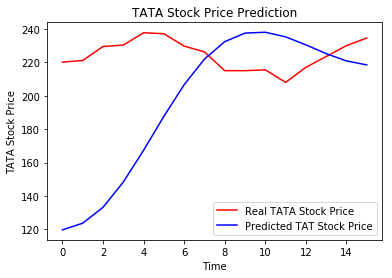

In [26]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()